In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)

H = 200
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#Get the y value
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Transform images from (width, width, 3) to 3072-dimensional vectors (width*width*3)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

x_train: (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [14]:
iterations = 300
lr = 0.015
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0

#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    #indices = np.arange(Ntr)
    #rng.shuffle(indices)
    batch_indices = np.random.choice(Ntr, batch_size)	
    x = x_train[batch_indices]	
    y = y_train[batch_indices]
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) +b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
    loss_history.append(loss)
    #if t%10 ==0:
    print('iteration %d / %d: loss %f' %(t, iterations, loss))
    dy_pred = 1./batch_size*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat backward
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

iteration 0 / 300: loss 1.000024
iteration 1 / 300: loss 0.928100
iteration 2 / 300: loss 0.908178
iteration 3 / 300: loss 0.920678
iteration 4 / 300: loss 0.967696
iteration 5 / 300: loss 1.035505
iteration 6 / 300: loss 1.201306
iteration 7 / 300: loss 1.494116
iteration 8 / 300: loss 1.318911
iteration 9 / 300: loss 1.041249
iteration 10 / 300: loss 0.927491
iteration 11 / 300: loss 0.889582
iteration 12 / 300: loss 0.875796
iteration 13 / 300: loss 0.869548
iteration 14 / 300: loss 0.865845
iteration 15 / 300: loss 0.862988
iteration 16 / 300: loss 0.860258
iteration 17 / 300: loss 0.857412
iteration 18 / 300: loss 0.857019
iteration 19 / 300: loss 0.857925
iteration 20 / 300: loss 0.858303
iteration 21 / 300: loss 0.854184
iteration 22 / 300: loss 0.850879
iteration 23 / 300: loss 0.848753
iteration 24 / 300: loss 0.848170
iteration 25 / 300: loss 0.846574
iteration 26 / 300: loss 0.845904
iteration 27 / 300: loss 0.844022
iteration 28 / 300: loss 0.842225
iteration 29 / 300: loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

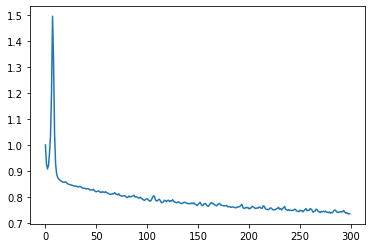

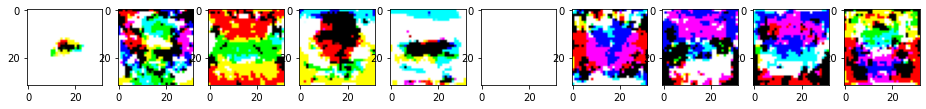

x_train -> (50000, 3072)
train_acc =  0.7779400000000001
train_loss =  0.87083778607242
x_test -> (10000, 3072)
test_acc =  0.7636777777777778
test_loss =  0.862155810763778


In [17]:
plt.plot(loss_history)
f, axarr = plt.subplots(1,10)
f.set_size_inches(16, 6)

for i in range(10):
    img = w1[:, i].reshape(32, 32, 3) # CIFAR10
    #img = w1[:, i].reshape(28, 28) # MNIST
    axarr[i].imshow(img*100000)
plt.show()

x_t = x_train
print("x_train ->", x_t.shape)
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred = h.dot(w2) + b2
train_acc = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1.0 -1/(81*Ntr)*np.square(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1)).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("train_acc = ", train_acc)
print("train_loss = ", train_loss)

x_t = x_test
print("x_test ->", x_t.shape)
h = 1.0/(1.0 + np.exp(-(x_t.dot(w1) + b1))) #sigmoid
y_pred= h.dot(w2) + b2
test_acc = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1.0 -1/(81*Nte)*np.square(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1)).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)